In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import random
font = cv2.FONT_HERSHEY_SIMPLEX


def display_img(img):
    fig = plt.figure(figsize=(40,20))
    ax = fig.add_subplot(111)
    ax.imshow(img)

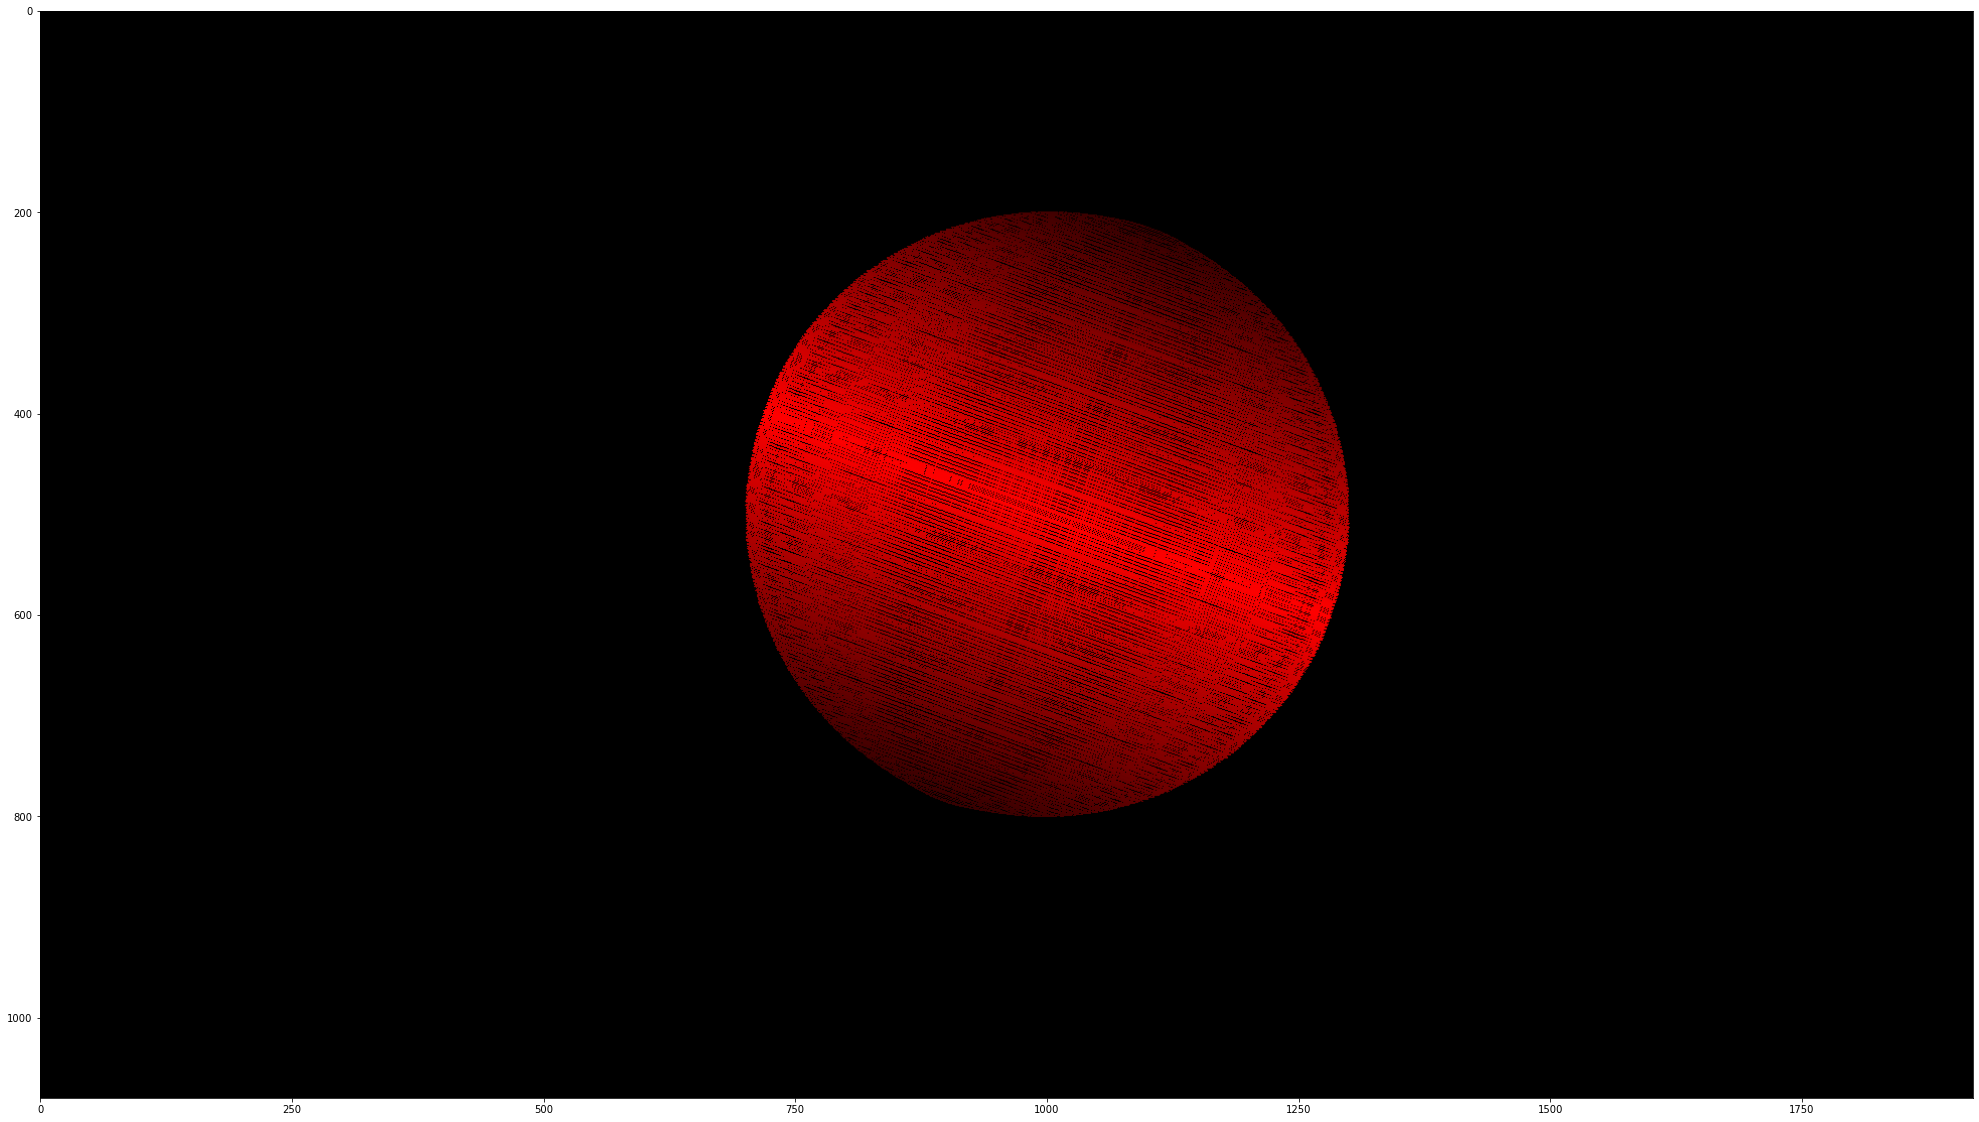

In [29]:
img = np.zeros((1080, 1920), dtype = np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def HighQualitySphere(img, radius, colorSphere, center, angle, dobra, quality):
    
    gap = 5

#     cv2.circle(img, center = (center), radius = radius, color = colorSphere, thickness = -1)

    for i in range((-quality), quality, gap):

        if i > 0:
            delta_color = (i)/gap

        if i < 0:
            delta_color = -(i)/gap

        delta_cos = int(((i/quality)*radius)*np.cos(angle*np.pi/180))
        delta_sin = int(((i/quality)*radius)*np.sin(angle*np.pi/180))

        r = np.sqrt((radius**2)-(delta_cos**2)-(delta_sin**2))
        
        cv2.ellipse(img, (center[0] + delta_sin, center[1] - delta_cos), axes = (int(r), dobra), angle = angle,
                    startAngle = 0, endAngle = 360, color = (colorSphere[0] - delta_color, colorSphere[1]- delta_color, colorSphere[2]- delta_color), thickness = 1)
        
#         cv2.ellipse(img, (1000,500), axes = (200, 20), angle = 0,
#                 startAngle = 0, endAngle = 360, color = (0,0,255), thickness = 1)
        
    return img
display_img(HighQualitySphere(img, radius = 300, center = (1000,500), colorSphere=(255,0,0), angle = 20, dobra = 4, quality = 1000))

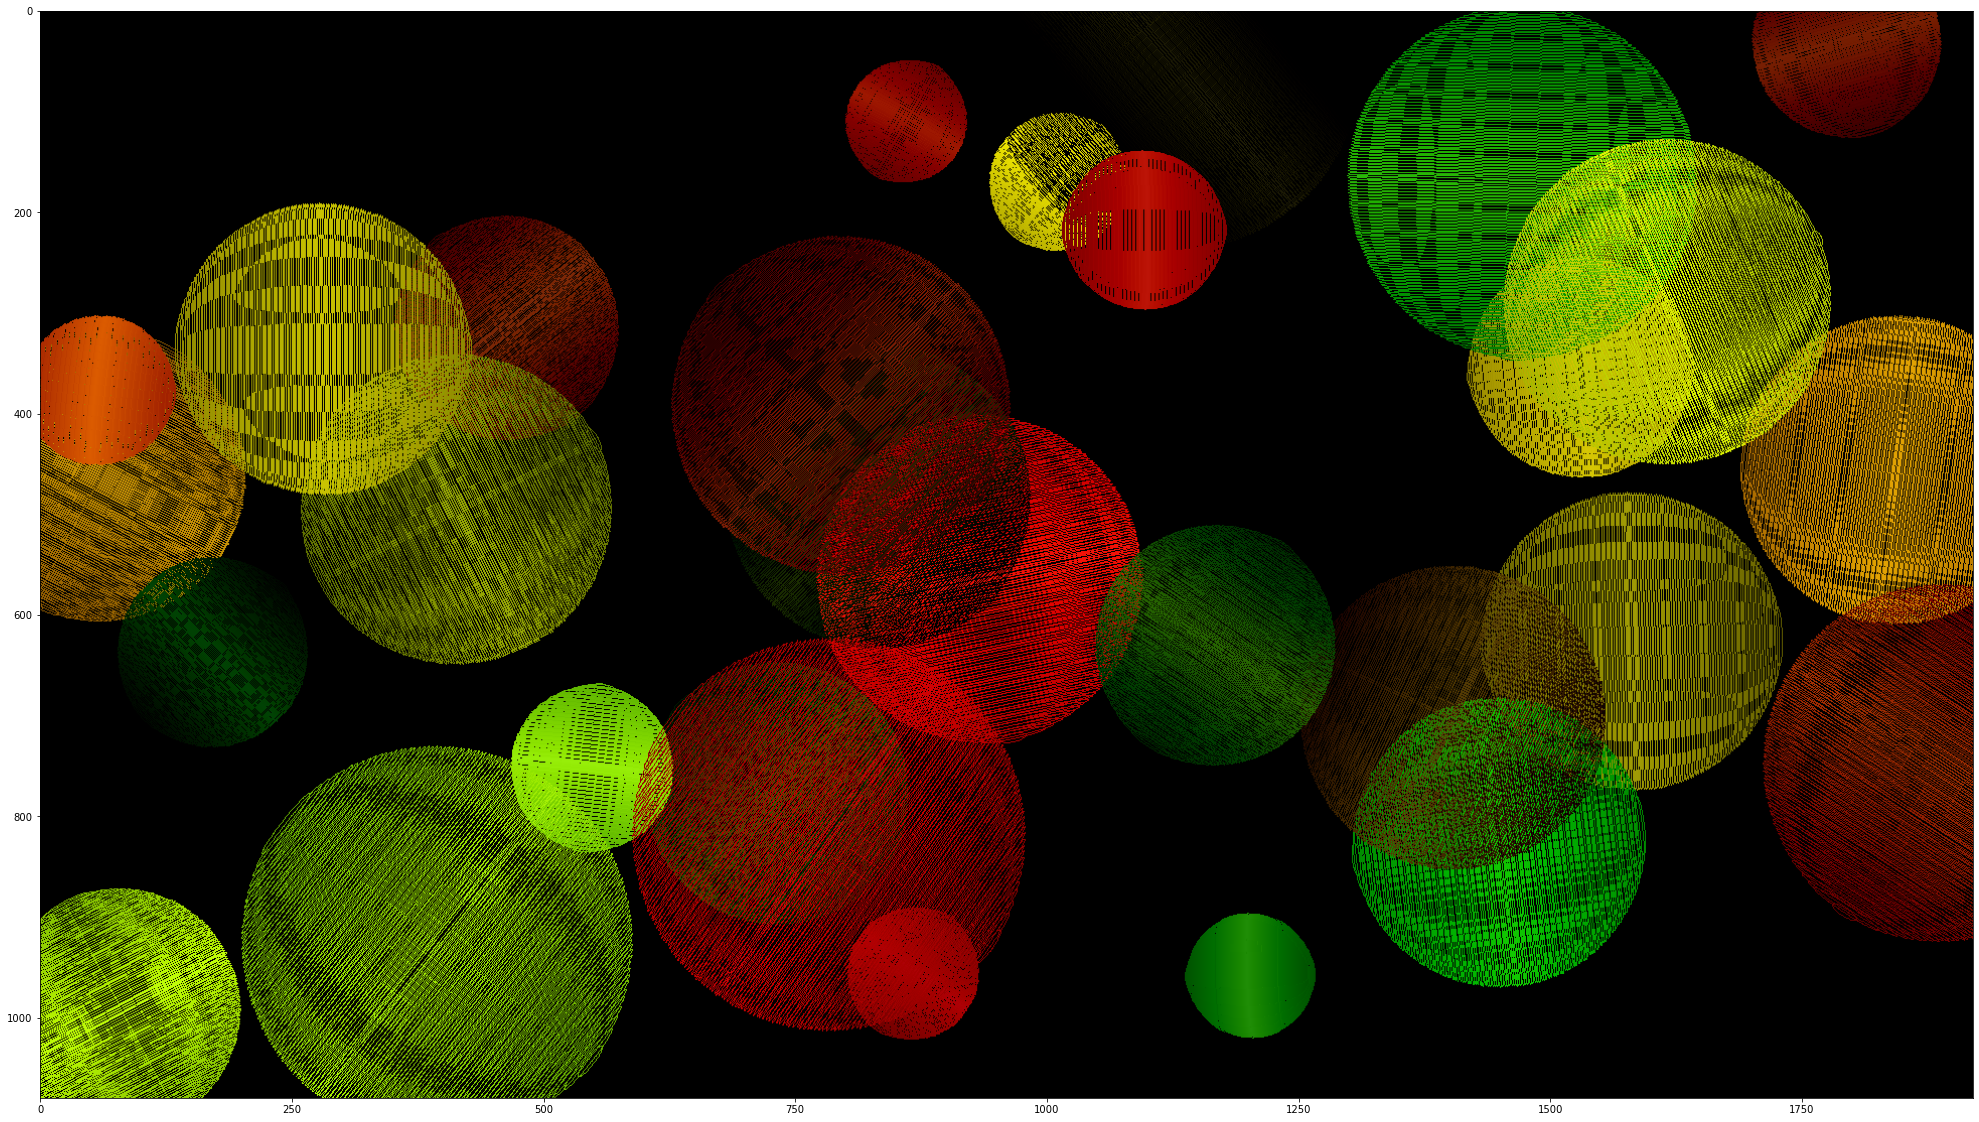

In [63]:
blank = np.zeros((1080, 1920), dtype = np.uint8)
blank = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)

for i in range(30):
    
    color1 = random.randint(0,255)
    color2 = random.randint(0,255)
    color3 = random.randint(0,10)
    colorSphere = (color1, color2, color3)
    
    minRadius = 60
    radius = random.randint(minRadius,200)
    angle = random.randint(0,360)
    
    lenght = blank.shape[1]
    width = blank.shape[0]
    step = random.randint(1,100)
    center = (random.randint(0,lenght),(random.randint(0,width)))
    
    blank = HighQualitySphere(blank, radius = radius, center = center, colorSphere=colorSphere, angle = angle, dobra = 4, quality = 300)
    
display_img(blank)

In [44]:
cv2.imwrite('spheres.png', blank)

True